In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



In [33]:
df_home=pd.read_csv('/Users/aurelientarroux/Desktop/Projet_prog/Projet_1/Data/Train_Data/train_home_team_statistics_df.csv')
df_away=pd.read_csv('/Users/aurelientarroux/Desktop/Projet_prog/Projet_1/Data/Train_Data/train_away_team_statistics_df.csv')

df_home.columns='home_'+df_home.columns
df_away.columns='away_'+df_away.columns

df_result=pd.read_csv('/Users/aurelientarroux/Desktop/Projet_prog/Projet_1/Data/Y_train_1rknArQ.csv')

base_match=pd.merge(df_home,df_away,left_on="home_ID",right_on='away_ID',how='inner')
base=pd.merge(base_match,df_result,left_on="home_ID",right_on='ID',how='inner')
base=base.drop(['home_ID','home_LEAGUE','home_TEAM_NAME','away_ID','away_LEAGUE','away_TEAM_NAME'],axis=1)

def resultat(row):
    if row['HOME_WINS']==1:
        return 'HOME'
    elif row['AWAY_WINS']==1:
        return 'AWAY'
    else:
        return 'DRAW'

base['Resultat']=base.apply(resultat, axis=1)
base=base.drop(['HOME_WINS','AWAY_WINS','DRAW'],axis=1)

base.dropna(inplace=True)

X = base.drop(['Resultat','ID'],axis=1)
y = base['Resultat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
liste=[]
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    liste+=[[k,accuracy]]


In [35]:
liste.sort(key=lambda x:x[1],reverse=True)

knn = KNeighborsClassifier(n_neighbors=liste[0][0])
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)




0.5075620084694494


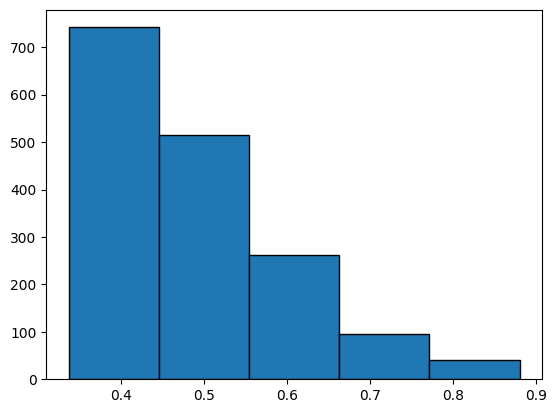

In [36]:
a=knn.predict_proba(X_test)
liste=[]
for k in a:
    liste+=[max(k)]
plt.hist(liste, bins=5, edgecolor='black')
plt.show()
